In [5]:
%pylab inline
import hmmlearn, pomegranate, time, seaborn
from hmmlearn.hmm import *
from pomegranate import *
seaborn.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [6]:
def initialize_components(n_components, n_seqs):
    """
    Initialize a transition matrix for a model with a fixed number of components,
    for Gaussian emissions with a certain number of dimensions, and a data set
    with a certain number of sequences.
    """
    
    transmat = numpy.zeros((n_components, n_components))
    transmat[-1, -1] = 1
    for i in range(n_components-1):
        transmat[i, i] = 1
        transmat[i, i+1] = 1
    transmat[ transmat < 0 ] = 0
    transmat = (transmat.T / transmat.sum( axis=1 )).T
    
    start_probs = numpy.abs( numpy.random.randn(n_components) )
    start_probs /= start_probs.sum()

    dists = numpy.abs(numpy.random.randn(n_components, 4))
    dists = (dists.T / dists.T.sum(axis=0)).T
    
    seqs = numpy.random.randint(0, 4, (n_seqs, n_components*2, 1))
    return transmat, start_probs, dists, seqs


In [7]:
def hmmlearn_model(transmat, start_probs, dists):
    """Return a hmmlearn model."""

    model = MultinomialHMM(n_components=transmat.shape[0], n_iter=1, tol=1e-8)
    model.startprob_ = start_probs
    model.transmat_ = transmat
    model.emissionprob_ = dists
    return model

In [8]:
def pomegranate_model(transmat, start_probs, dists):
    """Return a pomegranate model."""
    
    states = [ DiscreteDistribution({ 'A': d[0],
                                      'C': d[1],
                                      'G': d[2], 
                                      'T': d[3] }) for d in dists ]
    model = HiddenMarkovModel.from_matrix(transmat, states, start_probs, merge='None')
    return model


In [17]:
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [57]:
np.shape(seqs)

(50, 180)

In [20]:
n_seqs = 50
hllp, plp = [], []
hlv, pv = [], []
hlm, pm = [], []
hls, ps = [], []
hlt, pt = [], []

dna = 'ACGT'

for i in tqdm(range(10, 100, 10)):
    ########### HMMlearn model
    transmat, start_probs, dists, seqs = initialize_components(i, n_seqs)
    model = hmmlearn_model(transmat, start_probs, dists)

    # time to determine score of model
    tic = time.time()
    for seq in seqs:
        model.score(seq)
    hllp.append( time.time() - tic )

    # time to make a prediction Viterbi
    tic = time.time()
    for seq in seqs:
        model.predict(seq)
    hlv.append( time.time() - tic )

    # time to predict probability MAP
    tic = time.time()
    for seq in seqs:
        model.predict_proba(seq)
    hlm.append( time.time() - tic )    

    # time to fit model
    tic = time.time()
    model.fit(seqs.reshape(n_seqs*i*2, 1), lengths=[i*2]*n_seqs)
    hlt.append( time.time() - tic )
    
    ########## pomegranite model
    model = pomegranate_model(transmat, start_probs, dists)
    seqs = [[dna[i[0]] for i in seq] for seq in seqs]
    
    # time to determine score of model
    tic = time.time()
    for seq in seqs:
        model.log_probability(seq)
    plp.append( time.time() - tic )

    tic = time.time()
    for seq in seqs:
        model.predict(seq)
    pv.append( time.time() - tic )

    tic = time.time()
    for seq in seqs:
        model.predict_proba(seq)
    pm.append( time.time() - tic )    

    tic = time.time()
    model.fit(seqs, max_iterations=1, verbose=False)
    pt.append( time.time() - tic )

In [62]:
seqs

[['A',
  'G',
  'T',
  'C',
  'G',
  'C',
  'G',
  'T',
  'G',
  'T',
  'C',
  'A',
  'T',
  'G',
  'A',
  'C',
  'C',
  'A',
  'C',
  'G',
  'T',
  'A',
  'C',
  'G',
  'T',
  'C',
  'G',
  'T',
  'C',
  'A',
  'G',
  'T',
  'G',
  'T',
  'C',
  'G',
  'C',
  'C',
  'T',
  'G',
  'G',
  'T',
  'T',
  'G',
  'T',
  'C',
  'A',
  'T',
  'T',
  'A',
  'G',
  'T',
  'G',
  'C',
  'A',
  'G',
  'T',
  'C',
  'G',
  'T',
  'T',
  'A',
  'A',
  'T',
  'G',
  'G',
  'G',
  'C',
  'C',
  'C',
  'A',
  'G',
  'C',
  'T',
  'T',
  'G',
  'A',
  'G',
  'T',
  'A',
  'C',
  'C',
  'G',
  'T',
  'G',
  'G',
  'C',
  'C',
  'A',
  'T',
  'C',
  'A',
  'T',
  'G',
  'G',
  'G',
  'G',
  'T',
  'G',
  'G',
  'T',
  'T',
  'C',
  'G',
  'G',
  'A',
  'A',
  'A',
  'T',
  'G',
  'A',
  'A',
  'C',
  'G',
  'C',
  'C',
  'C',
  'G',
  'G',
  'C',
  'G',
  'A',
  'A',
  'G',
  'A',
  'A',
  'A',
  'C',
  'T',
  'T',
  'T',
  'A',
  'C',
  'T',
  'A',
  'A',
  'C',
  'C',
  'A',
  'T',
  'A',
  'A',
  'A',

In [32]:
model.summarize()

TypeError: summarize() takes at least 1 positional argument (0 given)

In [36]:
model.state_count()

92

In [37]:
model.states

[{
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "A" : 0.10913458697968459,
                 "C" : 0.11827693237081993,
                 "G" : 0.3100834250036938,
                 "T" : 0.46250505564580185
             }
         ],
         "frozen" : false
     },
     "name" : "s0",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "A" : 0.2012503720060658,
                 "C" : 0.4527589457634439,
                 "G" : 0.03725159606060838,
                 "T" : 0.30873908616988205
             }
         ],
         "frozen" : false
     },
     "name" : "s1",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
    

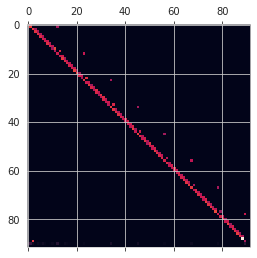

In [40]:
plt.matshow(model.dense_transition_matrix())

In [45]:
model.edge_count()

269

In [50]:
model.node_count()

92

In [51]:
model.graph

In [54]:
model.log_probability

<function HiddenMarkovModel.log_probability>

In [55]:
model.state_count()

92

In [52]:
import networkx as nx

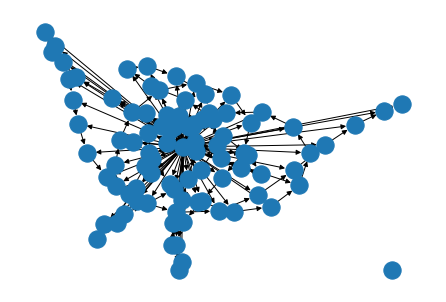

In [53]:
nx.draw(model.graph)

In [43]:
model.edges

In [42]:
print(model.to_json())

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "A" : 0.10913458697968459,
                        "C" : 0.11827693237081993,
                        "G" : 0.3100834250036938,
                        "T" : 0.46250505564580185
                    }
                ],
                "frozen" : false
            },
            "name" : "s0",
            "weight" : 1.0
        },
        {
            "class" : "State",
           

In [33]:
model

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "A" : 0.10913458697968459,
                        "C" : 0.11827693237081993,
                        "G" : 0.3100834250036938,
                        "T" : 0.46250505564580185
                    }
                ],
                "frozen" : false
            },
            "name" : "s0",
            "weight" : 1.0
        },
        {
            "class" : "State",
           

In [60]:
pomegranate.utils.is_gpu_enabled()

False

In [61]:
pomegranate.utils.disable_gpu()
pomegranate.utils.is_gpu_enabled()

False

Text(0.5, 1.0, 'HMMLearn')

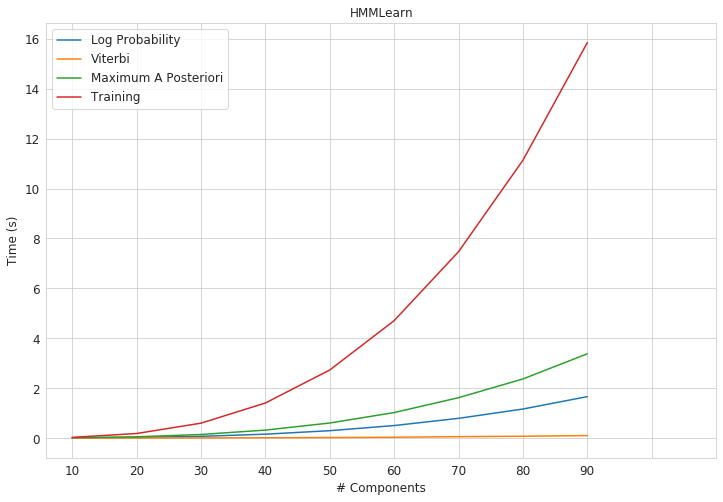

In [27]:
plt.figure( figsize=(12, 8))
plt.xlabel("# Components", fontsize=12 )
plt.ylabel("Time (s)", fontsize=12 )
plt.plot( numpy.array(hllp) , label="Log Probability")
plt.plot( numpy.array(hlv), label="Viterbi")
plt.plot( numpy.array(hlm), label="Maximum A Posteriori")
plt.plot( numpy.array(hlt) , label="Training")
plt.xticks( np.arange(11), np.arange(10, 100, 10), fontsize=12 )
plt.yticks( fontsize=12 )
plt.legend( fontsize=12 )
plt.title('HMMLearn')

Text(0.5, 1.0, 'Pomegranite')

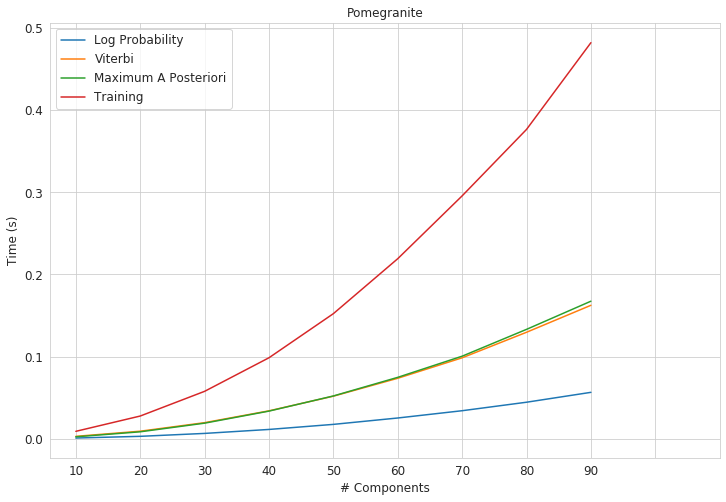

In [28]:
plt.figure( figsize=(12, 8))
plt.xlabel("# Components", fontsize=12 )
plt.ylabel("Time (s)", fontsize=12 )
plt.plot(numpy.array(plp), label="Log Probability")
plt.plot(numpy.array(pv), label="Viterbi")
plt.plot(numpy.array(pm), label="Maximum A Posteriori")
plt.plot(numpy.array(pt), label="Training")
plt.xticks( np.arange(11), np.arange(10, 100, 10), fontsize=12 )
plt.yticks( fontsize=12 )
plt.legend( fontsize=12 )
plt.title('Pomegranite')

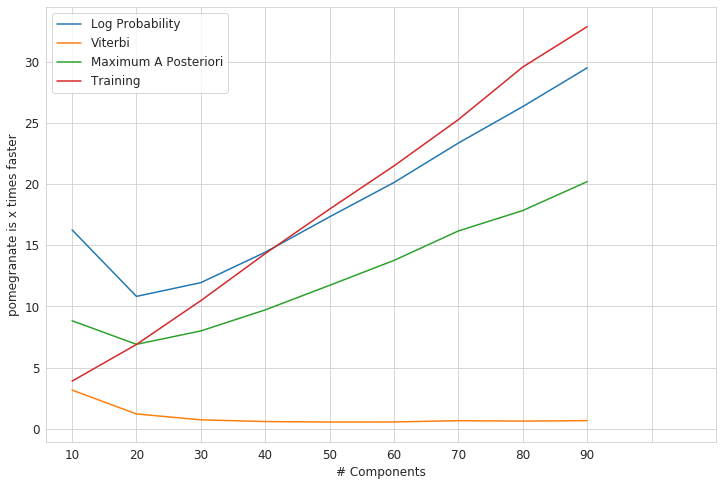

In [24]:
plt.figure( figsize=(12, 8))
plt.xlabel("# Components", fontsize=12 )
plt.ylabel("pomegranate is x times faster", fontsize=12 )
plt.plot( numpy.array(hllp) / numpy.array(plp), label="Log Probability")
plt.plot( numpy.array(hlv) / numpy.array(pv), label="Viterbi")
plt.plot( numpy.array(hlm) / numpy.array(pm), label="Maximum A Posteriori")
plt.plot( numpy.array(hlt) / numpy.array(pt), label="Training")
plt.xticks( np.arange(11), np.arange(10, 100, 10), fontsize=12 )
plt.yticks( fontsize=12 )
plt.legend( fontsize=12 )